<a href="https://colab.research.google.com/github/CllsPy/ML-Recipes/blob/main/fast_ai_Cap_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Docu

Versão funcional sistema de busca de imagens - https://www.kaggle.com/code/carloscll/fast-ai-pokemon-or-digimon

In [4]:
# requerimentos
!pip install --q fastbook

In [5]:
# basico
import fastai


# importações
from fastbook import *
from fastai.vision.widgets import *
from time import sleep


# reprodutibilidade
SEED = 101

In [ ]:
np.random.seed(SEED) # seed

def search_images(term, max_images=30):
    '''
    This function searches for images using DuckDuckGo.

    term: a string with the title you want to search for e.g 'cats'
    max_images: the number of images to be searched
    '''
    #print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))


searches = 'Batman', 'Joker', 'Wonder Woman' # terms
path = Path('/content/sample_data') # save path


'''
This loop searches for and downloads images from different
categories for each specified search term.
The categories include "photo", "sun photo",
and "shade photo". After downloading each image,
the loop pauses for 10 seconds to avoid overloading the server.
After downloading all images,
it resizes all found images to a maximum size of 400 pixels.
'''
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)


'''
Looks for corrupted data and
deletes it.
'''
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.33, seed=SEED),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)


'''
train model and be happy :)
'''
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.685500,0.971681,0.378049,00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.599017,0.531050,0.207317,00:40
1,0.372115,0.311842,0.097561,00:39
2,0.273674,0.280021,0.109756,00:40


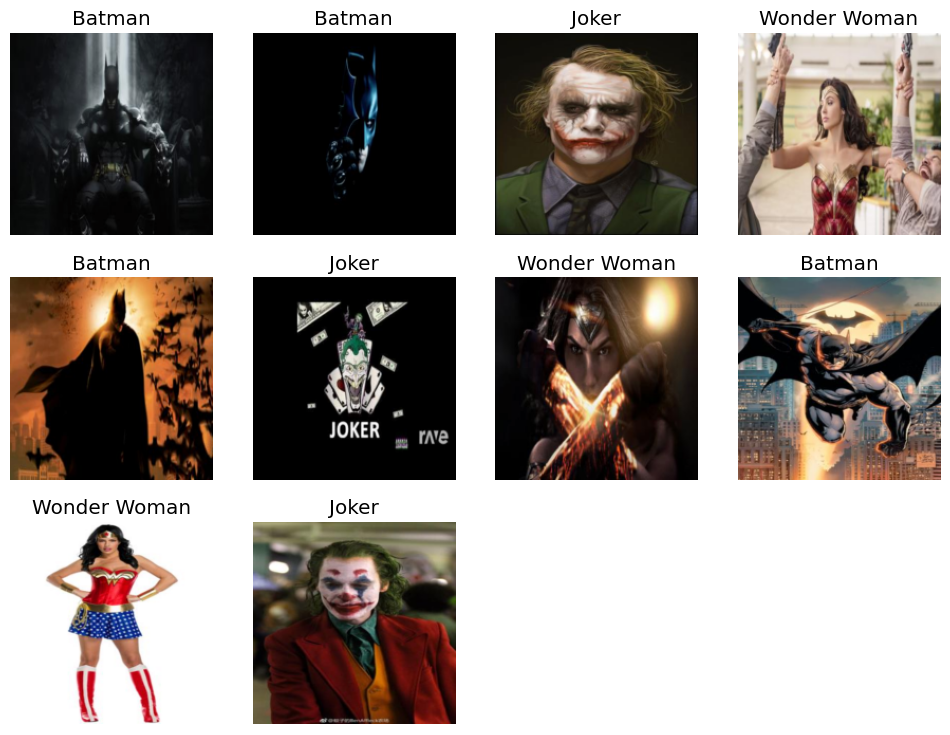

In [10]:
np.random.seed(SEED)
dls.show_batch(max_n=10);

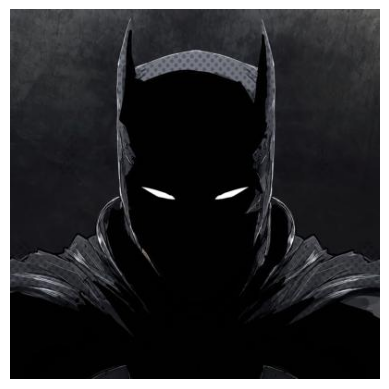

This is: Batman.


In [15]:
is_,_,probs = learn.predict(PILImage.create('/content/sample_data/Batman/06c958e4-2662-464c-86a3-77c53f111aad.jpg'))

# show image
img = PILImage.create('/content/sample_data/Batman/06c958e4-2662-464c-86a3-77c53f111aad.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"This is: {is_}.")
#print(f"Probability it's Batman: {probs[1]:.4f}")